This file almost use the same code as fit_exponential.ipynb.
But we copy for analyzing result if alter stop criteria to algorithm 
The QRNG can lead convergence faster or not. The key idea look simply.
However, with many test case, it's very hard to make comparison without statistic tool.
We are not present this issues to our work yet.

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from glob import glob
import seaborn as sns
import scipy
import os
import re

In [13]:
def dataExtract(file):
    """
        file: history file per trial
    """
    f = open(file, "r")
    lines = f.readlines()

    trialData = [re.findall(r"-?\ *[0-9]+\.?[0-9]*(?:[Ee]\ *-?\ *[0-9]+)?", line) for line in lines]

    return trialData

In [14]:
def findStopPoint(data, stableRound = 50):
    old_global_fitness = 0
    for history in data:
        if(history[2] == old_global_fitness):
            repeat +=1
        else:
            old_global_fitness = history[2]
            repeat = 0
        if(repeat == stableRound):
            return history
    return data[-1]

In [15]:
def stopHistory(trialFolder):
    # epochAvg = np.zeros(1000)
    stopData = []
    trialNum = 0

    for file in glob(f"{trialFolder}\\*\\*\\e=1000p=100_history.txt"):
        # print(file)
        data = dataExtract(file)
        stopData.append(findStopPoint(data))

    # meanTrialData = trialData/trialNum
    return stopData

In [16]:
stopHistory("D:\\experimentData\\ga\\CEC2021\\F22021\\Ibm")

[[' 209',
  ' 215.40820392088472',
  ' 215.40820392088472',
  ' 0.6688339310488332',
  ' 1.3652396175889001',
  ' 98.6347603824111',
  ' 0.03577365726232529'],
 [' 272',
  ' 238.9218250183585',
  ' 238.9218250183585',
  ' 1.4354182932669703',
  ' 3.5693349447334795',
  ' 96.43066505526652',
  ' 0.03527783043682575'],
 [' 210',
  ' 181.62588836692976',
  ' 181.62588836692976',
  ' 1.0737551975516217',
  ' 2.4105488867393805',
  ' 97.58945111326062',
  ' 0.03592178039252758'],
 [' 279',
  ' 446.1678770005269',
  ' 446.1678770005269',
  ' 2.369503071775719',
  ' 5.303675219825013',
  ' 94.69632478017499',
  ' 0.03559933975338936'],
 [' 294',
  ' 372.81106094376537',
  ' 372.81106094376537',
  ' 1.599168420226499',
  ' 3.373507389806859',
  ' 96.62649261019314',
  ' 0.03655114956200123'],
 [' 381',
  ' 365.6408502837767',
  ' 365.6408502837767',
  ' 0.955656040234633',
  ' 2.056130138712711',
  ' 97.94386986128728',
  ' 0.035388119518756866'],
 [' 200',
  ' 351.73153729790374',
  ' 351.731

In [17]:
def createModelSummary(dataFolder):
    columns=["algo", "problem", "testcase", "rng",
              "stop_epoch", "fitness", "diversity", "exploitaion"]
    matrixData = []

    for algoFolder in glob(f"{dataFolder}\\*"):
        algo = os.path.basename(algoFolder)
        for problemFolder in glob(f"{algoFolder}\\*"):
            problem = os.path.basename(problemFolder)
            for testCaseFolder in glob(f"{problemFolder}\\*"):
                testCase = os.path.basename(testCaseFolder)
                for rngFolder in glob(f"{testCaseFolder}\\*"):
                    rng = os.path.basename(rngFolder)
                    print(testCase, problem, rngFolder)
                    for trial in stopHistory(rngFolder):
                        matrixData.append([algo, problem, testCase, rng,
                                          int(trial[0]), float(trial[2]), float(trial[3]), float(trial[4])])

    df_main = pd.DataFrame(matrixData, columns=columns)
    
    return df_main

In [18]:
df = createModelSummary("D:\\QuantumResult\\historyAPR")

F102021 CEC2021 D:\QuantumResult\historyAPR\abc\CEC2021\F102021\BeamSplitter
F102021 CEC2021 D:\QuantumResult\historyAPR\abc\CEC2021\F102021\Ibm
F102021 CEC2021 D:\QuantumResult\historyAPR\abc\CEC2021\F102021\Mt19937
F102021 CEC2021 D:\QuantumResult\historyAPR\abc\CEC2021\F102021\QuasiRandom
F12021 CEC2021 D:\QuantumResult\historyAPR\abc\CEC2021\F12021\BeamSplitter
F12021 CEC2021 D:\QuantumResult\historyAPR\abc\CEC2021\F12021\Ibm
F12021 CEC2021 D:\QuantumResult\historyAPR\abc\CEC2021\F12021\Mt19937
F12021 CEC2021 D:\QuantumResult\historyAPR\abc\CEC2021\F12021\QuasiRandom
F22021 CEC2021 D:\QuantumResult\historyAPR\abc\CEC2021\F22021\BeamSplitter
F22021 CEC2021 D:\QuantumResult\historyAPR\abc\CEC2021\F22021\Ibm
F22021 CEC2021 D:\QuantumResult\historyAPR\abc\CEC2021\F22021\Mt19937
F22021 CEC2021 D:\QuantumResult\historyAPR\abc\CEC2021\F22021\QuasiRandom
F32021 CEC2021 D:\QuantumResult\historyAPR\abc\CEC2021\F32021\BeamSplitter
F32021 CEC2021 D:\QuantumResult\historyAPR\abc\CEC2021\F32021\

In [19]:
df

,algo,problem,testcase,rng,stop_epoch,fitness,diversity,exploitaion
0,abc,CEC2021,F102021,BeamSplitter,367,479.726406,10.215815,21.727607
1,abc,CEC2021,F102021,BeamSplitter,405,486.639957,7.422680,16.248367
2,abc,CEC2021,F102021,BeamSplitter,198,481.303147,12.974989,28.152322
3,abc,CEC2021,F102021,BeamSplitter,196,481.845990,12.029701,25.159185
4,abc,CEC2021,F102021,BeamSplitter,211,487.518175,11.788194,24.866421
...,...,...,...,...,...,...,...,...
7157,pso,tsp,St70,QuasiRandom,76,2961.100983,17.255714,99.504086
7158,pso,tsp,St70,QuasiRandom,75,3073.795361,17.337143,99.822333
7159,pso,tsp,St70,QuasiRandom,125,3020.718250,17.282000,99.594948
7160,pso,tsp,St70,QuasiRandom,113,2992.299114,17.259429,99.414127


<Axes: title={'center': 'stop epoch distribution of maxcut problem'}, xlabel='rng', ylabel='stop_epoch'>

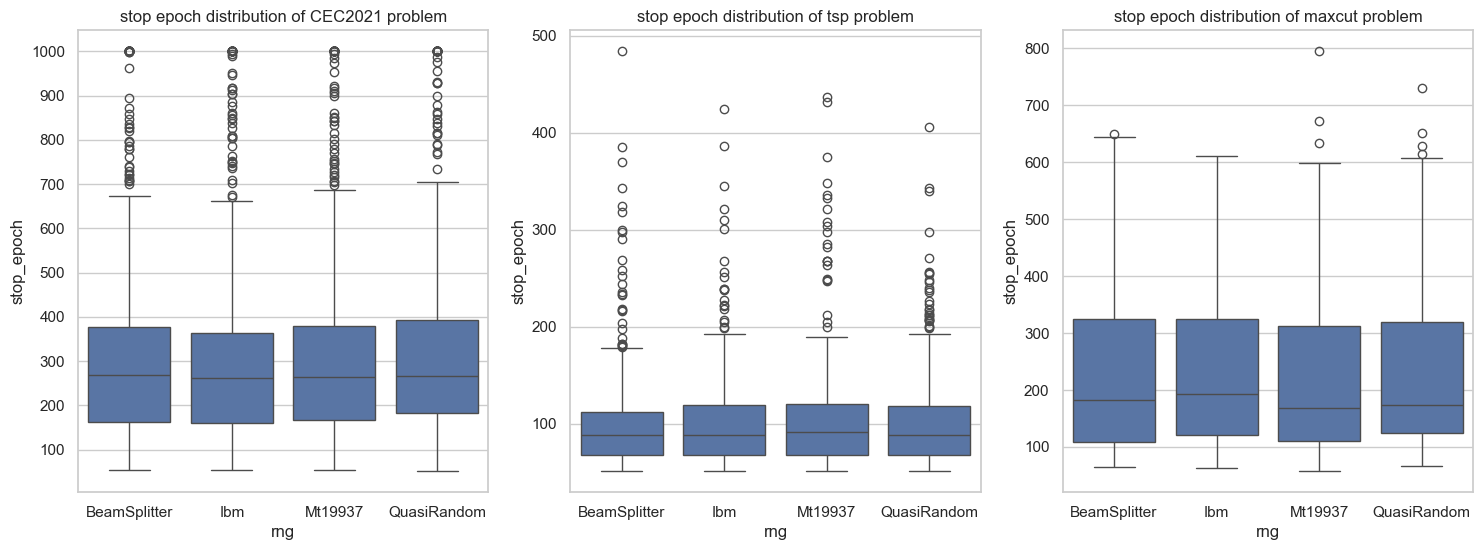

In [20]:
# filterTemp = temp[temp["problem"] == "maxcut"]
fig, axes = plt.subplots(1, 3, figsize = (18,6))

plt.setp(axes, yticks=range(0,1001,100))

filterTemp = df[df["problem"] == "CEC2021"]
axes[0].set_title('stop epoch distribution of CEC2021 problem')
axes[0].grid(True)
sns.boxplot(x= filterTemp["rng"], y = filterTemp["stop_epoch"], ax= axes[0])

filterTemp = df[df["problem"] == "tsp"]
axes[1].set_title('stop epoch distribution of tsp problem')
axes[1].grid(True)
sns.boxplot(x= filterTemp["rng"], y = filterTemp["stop_epoch"], ax= axes[1])

filterTemp = df[df["problem"] == "maxcut"]
axes[2].set_title('stop epoch distribution of maxcut problem')
axes[2].grid(True)
sns.boxplot(x= filterTemp["rng"], y = filterTemp["stop_epoch"], ax= axes[2])

In [21]:
resultDf = df.groupby(['algo', "problem", "testcase", "rng"]).mean()
temp = resultDf.reset_index()
temp

,algo,problem,testcase,rng,stop_epoch,fitness,diversity,exploitaion
0,abc,CEC2021,F102021,BeamSplitter,238.700000,4.875356e+02,13.000685,27.595143
1,abc,CEC2021,F102021,Ibm,229.633333,4.883197e+02,12.243234,25.784523
2,abc,CEC2021,F102021,Mt19937,251.933333,4.867648e+02,12.587361,26.894971
3,abc,CEC2021,F102021,QuasiRandom,293.333333,4.988334e+02,11.817241,49.486973
4,abc,CEC2021,F12021,BeamSplitter,285.033333,4.526397e+06,9.006928,19.118241
...,...,...,...,...,...,...,...,...
235,pso,tsp,Pr76,QuasiRandom,88.633333,4.730144e+05,18.646614,99.155787
236,pso,tsp,St70,BeamSplitter,87.200000,2.956212e+03,17.262581,99.560371
237,pso,tsp,St70,Ibm,77.033333,2.964642e+03,17.226514,99.303239
238,pso,tsp,St70,Mt19937,79.033333,2.965696e+03,17.254981,99.474725


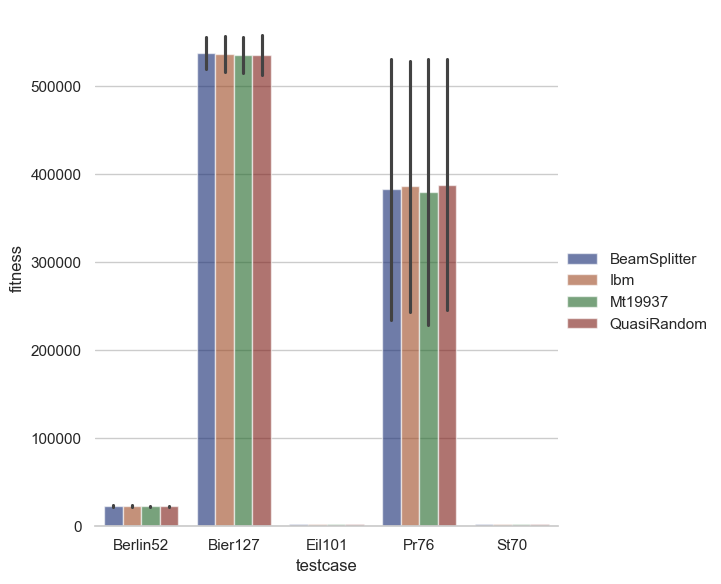

In [22]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data= temp[temp["problem"] == "tsp"], kind = "bar",
    x="testcase", y="fitness", hue="rng",
    errorbar="sd", palette="dark", alpha=.6, height=6
)

g.despine(left=True)
g.set_axis_labels("testcase", "fitness")
g.legend.set_title("")
